## Kütüphaneler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sahte Veri Oluşturma

In [3]:
data = {
    "Yıl": np.arange(2010, 2021),
    "Satış": np.random.randint(100, 500, 11),
    "Masraf": np.random.randint(50, 400, 11)
}

df = pd.DataFrame(data)

regions = ["Kuzey", "Güney", "Doğu", "Batı"]

df["Bölge"] = np.random.choice(["Kuzey", "Güney", "Doğu", "Batı"], df.shape[0])

df

,Yıl,Satış,Masraf,Bölge
0,2010,343,156,Kuzey
1,2011,474,218,Batı
2,2012,288,256,Kuzey
3,2013,245,330,Batı
4,2014,207,352,Güney
5,2015,495,78,Güney
6,2016,186,172,Batı
7,2017,295,386,Batı
8,2018,197,163,Doğu
9,2019,133,173,Doğu


## Kısa Tekrar

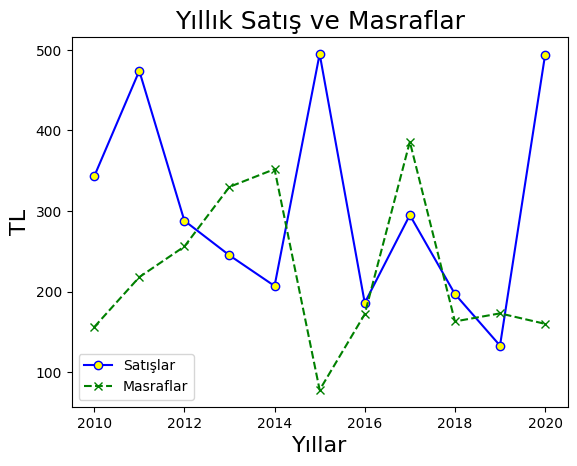

In [5]:
plt.plot(df["Yıl"], df["Satış"],
         label="Satışlar",
         linestyle = "-",
         marker="o", color="blue",
         markerfacecolor="yellow")

plt.plot(df["Yıl"], df["Masraf"],
         label="Masraflar",
         linestyle = "--",
         marker="x", color="green")

plt.title("Yıllık Satış ve Masraflar", fontsize = 18)
plt.xlabel("Yıllar", fontsize = 16)
plt.ylabel("TL", fontsize = 16)

plt.legend()
plt.show()

## plt.bar()
`plt.bar()` bir sütun grafiği çizer. Bu grafik türü, kategorilerin değerleri arasındaki ilişkiyi gösterir.

### Parametreler
`color`: Sütunların rengini belirtir.

`width`: Sütunların genişliğini kontrol eder

`edgecolor`: Sütunların kenarlık rengini belirler

`linewidth`: Kenarlık kalınlığını belirtir.

<BarContainer object of 5 artists>

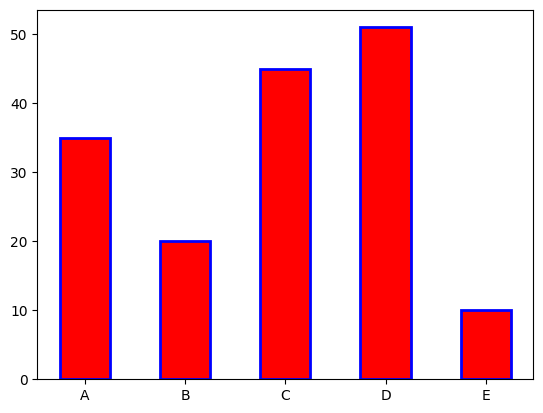

In [8]:
categories = ["A", "B", "C", "D", "E"]
values = [35, 20, 45, 51, 10]

plt.bar(categories, values, color = "red", width = 0.5, edgecolor="blue", linewidth=2)

<BarContainer object of 5 artists>

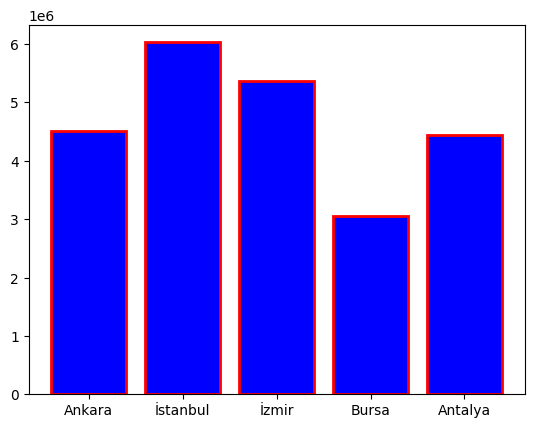

In [30]:
### Soru: Aşağıda verilen veri kümesindeki Şehir ve Nüfus değerlerini kullanarak bir barplot çiziniz:

data = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'],
         'Nüfus': [4503985, 6029231, 5367251, 3056120, 4444535] }

plt.bar(data['Şehir'], data['Nüfus'], color = "blue", width =0.8, edgecolor="red", linewidth=2)

<BarContainer object of 5 artists>

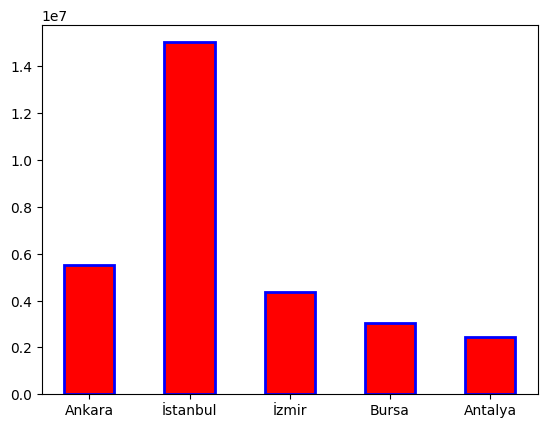

In [33]:
data_dict = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'],
         'Nüfus': [5503985, 15029231, 4367251, 3056120, 2444535] }

# scientific notation(1e7)
plt.bar(data_dict["Şehir"], data_dict["Nüfus"], color = "red", width = 0.5, edgecolor="blue", linewidth=2)

In [34]:
sales_by_region = df.groupby("Bölge")["Satış"].sum()
sales_by_region

,Satış
Bölge,
Batı,1200
Doğu,330
Güney,702
Kuzey,1125


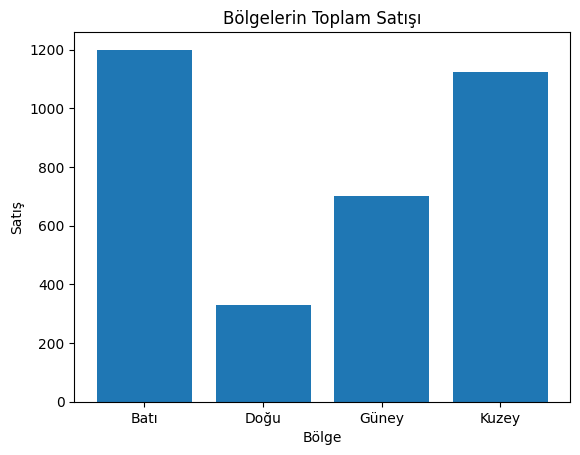

In [35]:
plt.bar(sales_by_region.index, sales_by_region.values)
plt.xlabel("Bölge")
plt.ylabel("Satış")
plt.title("Bölgelerin Toplam Satışı")
plt.show()

In [36]:
df

,Yıl,Satış,Masraf,Bölge
0,2010,343,156,Kuzey
1,2011,474,218,Batı
2,2012,288,256,Kuzey
3,2013,245,330,Batı
4,2014,207,352,Güney
5,2015,495,78,Güney
6,2016,186,172,Batı
7,2017,295,386,Batı
8,2018,197,163,Doğu
9,2019,133,173,Doğu


## Histogram Mantığı

<BarContainer object of 10 artists>

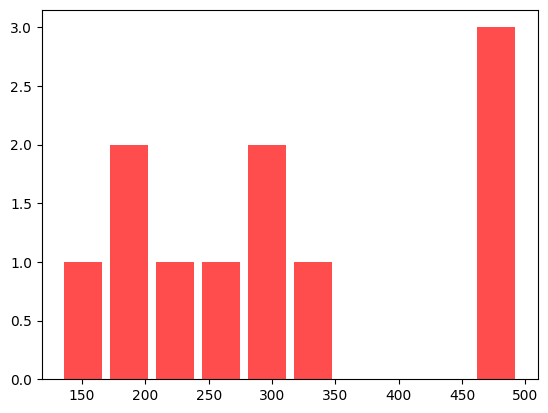

In [65]:
sales_bins = pd.cut(df["Satış"], bins=10)
# iki fonksiyon var. pd.cut ve pd.qcut
# bin: numerik datanın grubu olarak düşünülebilir
# - (114.999, 175.0] --> bin'i ifade eder.
# pandas cut: bin arası mesafe eşit - her bin'de eşit sayıda eleman olmayabilir.
# bin aralığı: 175 - 114 = 61, 236 - 175 = 61 gibi..

# pandas qcut: bin arası mesafe eşit değil - her bin'de eşit sayıda eleman olacak şekilde ayırır.
bin_counts = sales_bins.value_counts().sort_index()

# bin'lerdeki aralığın orta değerini alır
bin_middles = [(interval.left + interval.right) / 2 for interval in bin_counts.index]

plt.bar(bin_middles,
        bin_counts.values,
        width = 30, alpha = 0.7,
        color="red")

In [61]:
sales_binss = pd.cut(df["Satış"], bins=10)           #pd.cut
sales_binss                    #Toplam aralık genişliği = 495.0 − 132.638 = yaklaşık 362.362
                               #362.362 / 10 ≈ 36.236  Yani her bin yaklaşık 36.24 birim genişliğinde olur.

,Satış
0,"(314.0, 350.2]"
1,"(458.8, 495.0]"
2,"(277.8, 314.0]"
3,"(241.6, 277.8]"
4,"(205.4, 241.6]"
5,"(458.8, 495.0]"
6,"(169.2, 205.4]"
7,"(277.8, 314.0]"
8,"(169.2, 205.4]"
9,"(132.638, 169.2]"


In [62]:
sales_binss.value_counts()    #Aralıklardaki Satış Sayısı

,count
Satış,
"(458.8, 495.0]",3
"(169.2, 205.4]",2
"(277.8, 314.0]",2
"(132.638, 169.2]",1
"(241.6, 277.8]",1
"(205.4, 241.6]",1
"(314.0, 350.2]",1
"(350.2, 386.4]",0
"(386.4, 422.6]",0


In [64]:
sales_binss = pd.qcut(df["Satış"], q=10)   #pd.qcut
sales_binss.value_counts()

,count
Satış,
"(132.999, 186.0]",2
"(186.0, 197.0]",1
"(197.0, 207.0]",1
"(207.0, 245.0]",1
"(245.0, 288.0]",1
"(288.0, 295.0]",1
"(295.0, 343.0]",1
"(343.0, 474.0]",1
"(474.0, 494.0]",1


In [67]:
sales_binss = pd.qcut(df["Satış"], q=10)
sales_binss.value_counts().sort_index()         #sıraladık

,count
Satış,
"(132.999, 186.0]",2
"(186.0, 197.0]",1
"(197.0, 207.0]",1
"(207.0, 245.0]",1
"(245.0, 288.0]",1
"(288.0, 295.0]",1
"(295.0, 343.0]",1
"(343.0, 474.0]",1
"(474.0, 494.0]",1


## plt.hist()

``plt.hist()`` fonksiyonu, verilerin dağılımını göstermek için bir histogram grafiği çizer. Histogramlar, verilerin sıklığını veya yoğunluğunu görselleştirmek için kullanılır.

### Parametreler
`bins`: Grup sayısını belirler.

`range`: Bin'lerin alt ve üst limitini belirler.

`density`: True olursa grafik yoğunluk belirtir, false olursa frekans belirtir.

`color`: Bin rengi

`alpha`: Saydamlık opaklık

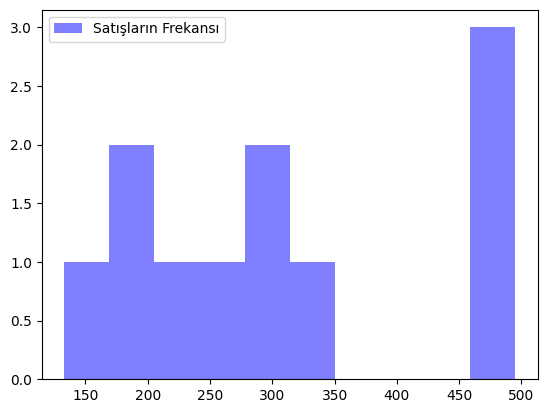

In [80]:
plt.hist(df["Satış"], bins = 10, alpha = 0.5,
         color="blue", label = "Satışların Frekansı")
plt.legend()
plt.show()

### Soru: numpy ile random veri oluşturup plt.hist() ile frekansını görselleştirin.
- np.random.randn faydalanabilirsiniz.
- Veri sayısı 1000 olsun.
- bins = 30 olsun
- renk vb. farketmez.

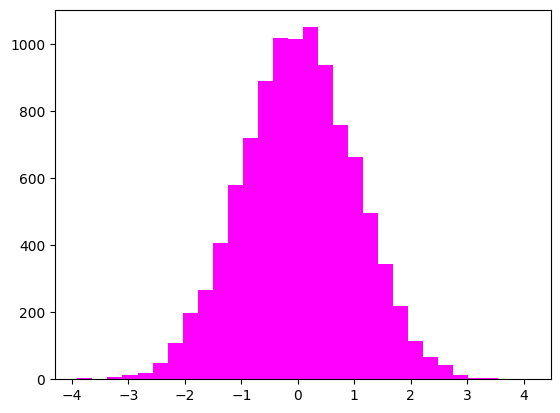

In [81]:
data_normal = np.random.randn(10000)
plt.hist(data_normal, bins=30, color="magenta")
plt.show()

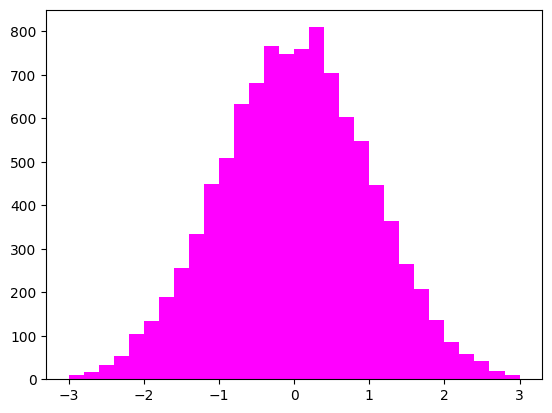

In [82]:
# Min-Max değişti
plt.hist(data_normal, bins=30, color="magenta",
         range=(-3, 3))
plt.show()

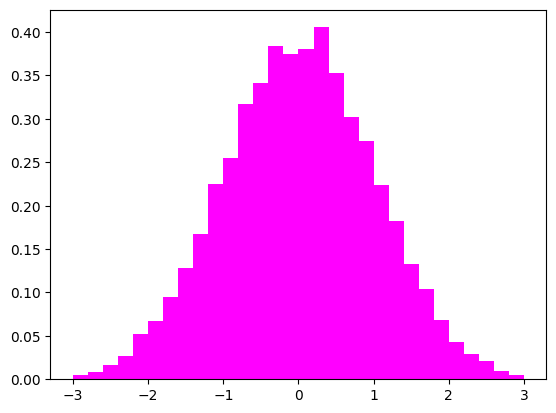

In [85]:
# y ekseni değişti, yoğunluk gosteriyor, normalize değerler.
plt.hist(data_normal, bins=30, color="magenta",
         range=(-3, 3), density = True)             #density ile normalize ettik
plt.show()

In [84]:
#Yasin